#Course 04

##Week-01

###Simmulating Time Series data

####Setup

In [0]:
!pip install tensorflow==2.0.0-beta0

In [0]:
!pip install -U tf-nightly-2.0-preview

ERROR: Could not find a version that satisfies the requirement tf-nightly-2.0-preview (from versions: none)
ERROR: No matching distribution found for tf-nightly-2.0-preview


In [0]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
print(tf.__version__)

2.0.0-beta0


In [0]:
# wrinting helper function to plot the graphs :

def plot_series( time , series , format = '-' , start = 0 , end = None , label = None):
  plt.figure(figsize = (10,6))
  plt.plot( time[start:end] , series[start:end] , format , label = label)
  plt.xlabel('time')
  plt.ylabel('value')
  if label:
    plt.legend(fontsize = 10)
  plt.grid(True)

####Trend and Seasonality

In [0]:
# lets now create the dataset :

def trend( time ,slope = 0 ):
  return slope * time

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]


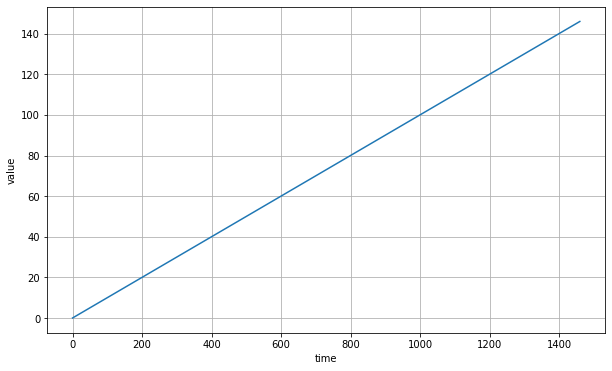

In [0]:
time = np.arange(4*365 + 1)
print(time[:50])
series = trend(time , 0.1)
plot_series(time ,series)
plt.show()

Lets us now define a function that returns : $\cos(2\pi x)$

Initial  X : 
 [0 1 2 3 4 5 6 7 8 9]

X after normalizing : 
 [0.         0.00273973 0.00547945 0.00821918 0.0109589  0.01369863
 0.01643836 0.01917808 0.02191781 0.02465753]

Corresponding Y values :
 [1.         0.99985184 0.9994074  0.99866682 0.99763031 0.99629817
 0.99467082 0.99274872 0.99053245 0.98802267 0.98522011 0.98212561
 0.97874008 0.97506453 0.97110005 0.96684781 0.96230908 0.95748519
 0.95237758 0.94698775]


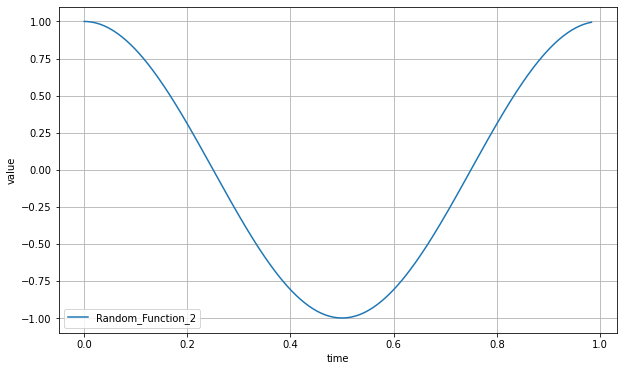

In [0]:
# define function Cos(2*pi*x)

def func_1(x):
  return np.cos(x * 2 * np.pi)

x = np.arange(360)
print('Initial  X : \n',x[:10])
# reduce x to range from 0 - 1 (appoximately )
x = (x % 365)/365
y = func_1(x)

print('\nX after normalizing : \n',x[:10])
print('\nCorresponding Y values :\n',y[:20])

plot_series(x,y,label = 'Random_Function_2')
plt.show()

Lets us define another function that returns : $\frac{1}{e^{3x}}$

Initial  X : 
 [0 1 2 3 4 5 6 7 8 9]

X after normalizing : 
 [0.         0.00273973 0.00547945 0.00821918 0.0109589  0.01369863
 0.01643836 0.01917808 0.02191781 0.02465753]

Corresponding Y values :
 [1.         0.99181451 0.98369602 0.97564398 0.96765785 0.9597371
 0.95188117 0.94408956 0.93636172 0.92869714 0.92109529 0.91355567
 0.90607777 0.89866108 0.89130509 0.88400932 0.87677327 0.86959645
 0.86247837 0.85541856]


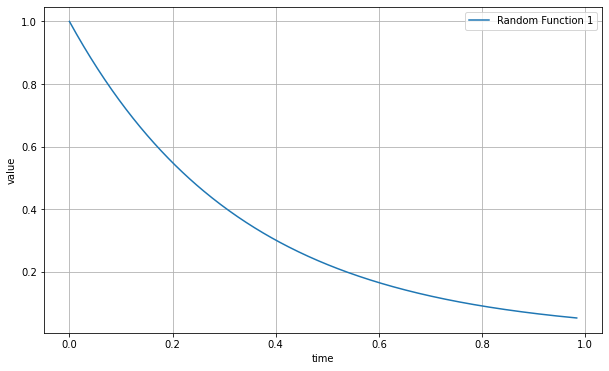

In [0]:
def func_2(x):
  return 1/np.exp(3 * x)

x = np.arange( 360)

print('Initial  X : \n',x[:10])
# reduce x to range from 0 - 1 (appoximately )
x = (x % 365)/365
y = func_2(x)

print('\nX after normalizing : \n',x[:10])
print('\nCorresponding Y values :\n',y[:20])

plot_series(x,y , label = 'Random Function 1')
plt.show()

In [0]:
# lets try to write a function to add a seasonal pattern to the time series 

def seasonal_pattern(season_time):
  return np.where(season_time < 0.4 , np.cos(season_time * 2 * np.pi) , 1/np.exp(3 * season_time))

def seasonality(time , period , amplitude = 1, phase = 0 ):
  reminder_wrt_period  = (time + phase) % period # value ranges from 0 - (period-1) , here 0-364 as period is 365
  season_time = (reminder_wrt_period) / period  # this value ranges from 0 - (appox)1 , here 0/365 to 364/365
  return amplitude * seasonal_pattern(season_time)


<class 'numpy.ndarray'>


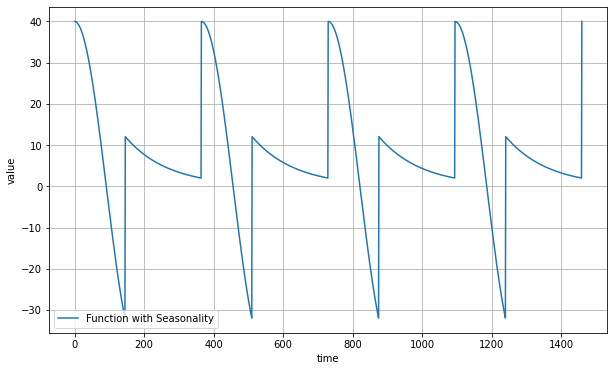

In [0]:
amplitude = 40

time = np.arange(4*365 + 1)

print(type(time))

series = seasonality(time , period = 365 , amplitude = amplitude)

plot_series(time, series , label = 'Function with Seasonality')

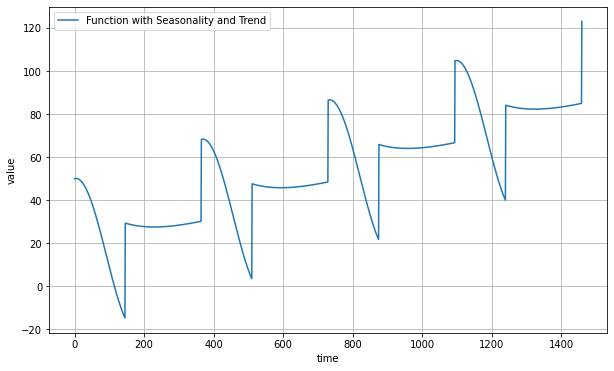

In [0]:
# Lets add a trend to this :

#time = np.arange(4*365 + 1)

baseline = 10 
slope = 0.05

series = baseline \
         + trend(time , slope) \
         + seasonality(time , period = 365 , amplitude = amplitude)
         
plot_series(time , series , label = 'Function with Seasonality and Trend')
plt.show()

####White-Noise  and Use it to Generate Noisy Series 

In [0]:
# Returns an array of random noise values equal to the size/no of elements in the time array
def white_noise_fn(time , noise_level , seed = None):
  rnd = np.random.RandomState(seed)
  return rnd.randn(len(time)) * noise_level

In [0]:
time = np.arange(4*365 + 1)

series_1 = [baseline]*len(time)

print(len(series_1))

1461


Lets now generate a noisy function :

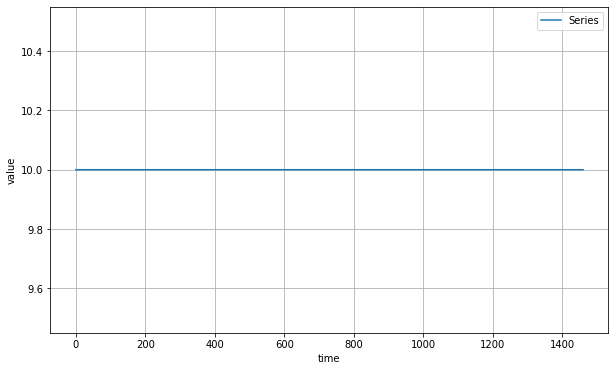

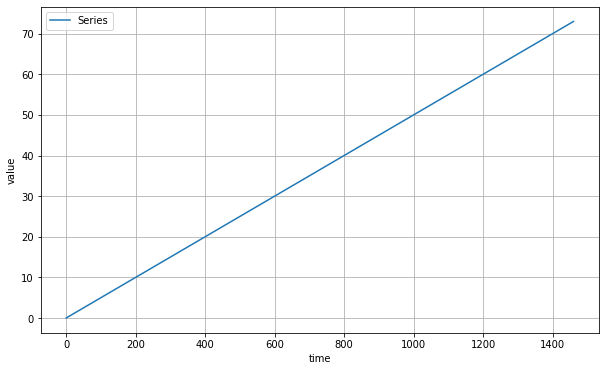

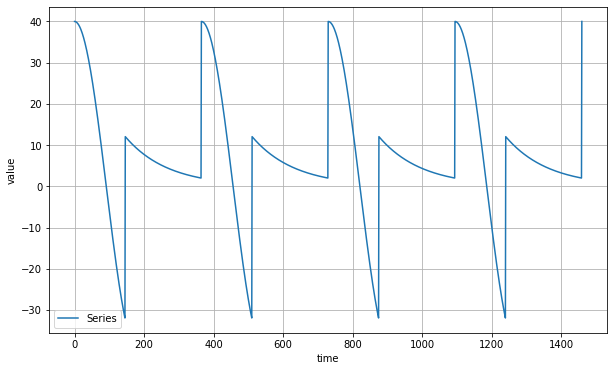

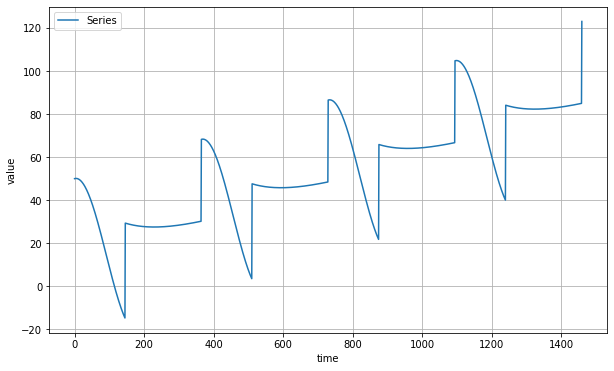

In [0]:
baseline, slope = 10, 0.05
time = np.arange(4*365 + 1)


series_1 = [baseline]*len(time)
plot_series(time , series_1 , label = 'Series')

series_2 = trend(time , slope)
plot_series(time , series_2 , label = 'Series')

series_3 = seasonality(time , period = 365 , amplitude = amplitude)
plot_series(time , series_3 , label = 'Series')



series = baseline \
         + trend(time , slope) \
         + seasonality(time , period = 365 , amplitude = amplitude)

# ---- or you can write it as -------------
#series = series_1 + series_2 + series_3

plot_series(time , series , label = 'Series')
plt.show()

1461
<class 'numpy.ndarray'>


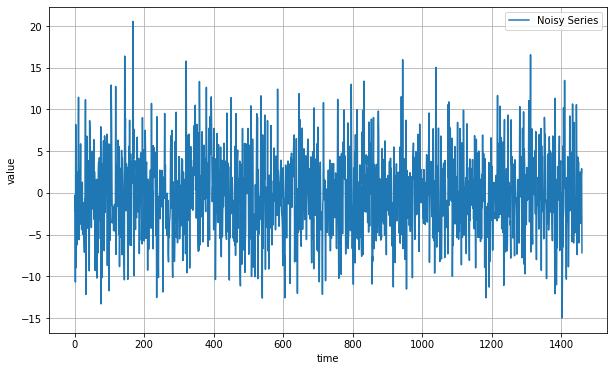

In [0]:
noise_level = 5

time = np.arange(4*365 + 1)
print(len(time))

white_noise =  white_noise_fn(time , noise_level , seed = 2 )
print(type(white_noise))
plot_series(time , white_noise , label = 'Noisy Series')
plt.show()

Adding this to the Series above to make the noisy series :

<Figure size 720x432 with 0 Axes>

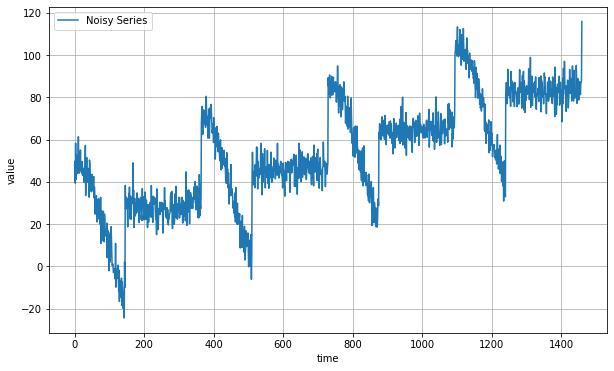

In [0]:
noisy_series = white_noise + series

plt.figure(figsize= (10,6))
plot_series(time , noisy_series , label = 'Noisy Series')
plt.show()

####Auto-Correlation

All right, this looks realistic enough for now. Let's try to forecast it. We will split it into two periods:

a) the training period and 

b) the validation period 

(in many cases, you would also want to have a test period). The split will be at time step 1000.

In [0]:
split_time = 1000

time_train = time[:split_time]
x_train = series[:split_time]
print(x_train.shape)

time_valid = time[split_time:]
x_valid = series[split_time:]
print(x_valid.shape)

(1000,)
(461,)


In [0]:
def autocorelation_1(time , amplitude , seed = None ):
  
  rnd = np.random.RandomState(seed)
  phi1, phi2 = 0.5,-0.1
  ar = rnd.randn(len(time) + 50 )
  #print(ar[:10])
  #print(ar.shape)
  ar[:50] = 100
  #print(ar[:10])


  for step in range(50 , len(time) + 50):
    ar[step] += phi1 * ar[step - 50]
    ar[step] += phi2 * ar[step-33]

  return ar[50:] * amplitude

print(time.shape)

series = autocorelation_1(time , amplitude =  10 , seed = 42)
print("\nType of the Series Generated : ",type(series))

(1461,)

Type of the Series Generated :  <class 'numpy.ndarray'>


In [0]:
def autocorelation_2(time , amplitude , seed = None ):
  rnd = np.random.RandomState(seed)
  phi1 = 0.8
  
  ar = rnd.randn(len(time) + 1 )
  
  for i in range(1 , len(time) +1):
    ar[i] = ar[i] + (phi1 * ar[i - 1])
  
  return ar[1:] * amplitude

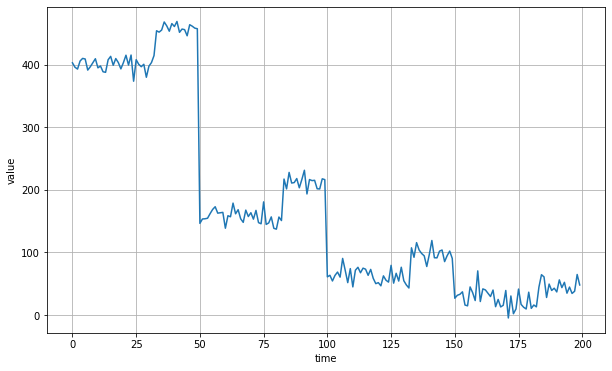

In [0]:
series = autocorelation_1(time , amplitude =  10 , seed = 42)
plot_series(time[:200], series[:200])
plt.show()

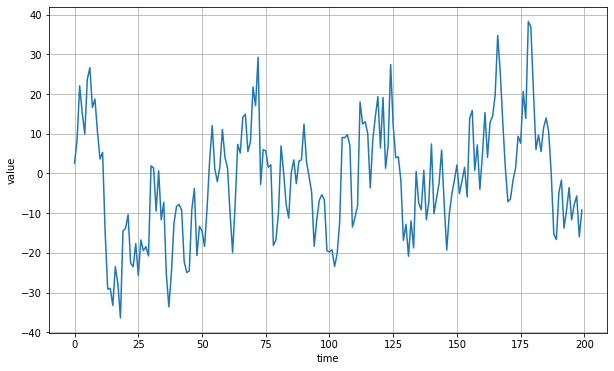

In [0]:
series = autocorelation_2(time , amplitude =  10 , seed = 42)
plot_series(time[:200], series[:200])
plt.show()

Lets add trend to it :

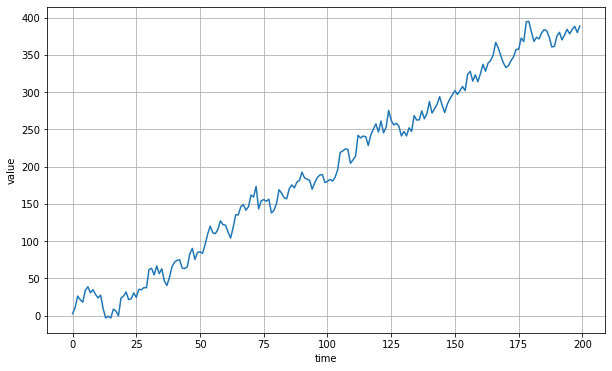

In [0]:
series = autocorelation_2(time , 10 , seed = 42 ) \
         + trend(time , 2)

plot_series(time[:200] , series[:200])
plt.show()

Adding Trend to Autocorelation_1 function :

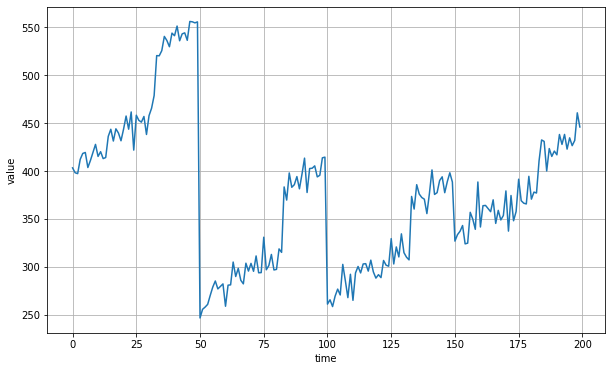

In [0]:
series = autocorelation_1(time , 10 , seed = 42 ) \
         + trend(time , 2)

plot_series(time[:200] , series[:200])
plt.show()

Let smake a little complex function using : 

1. trend() function 
2. seasonality() function 
3. autocorrelation_1() function 1 / autocorrelation_2() function 1

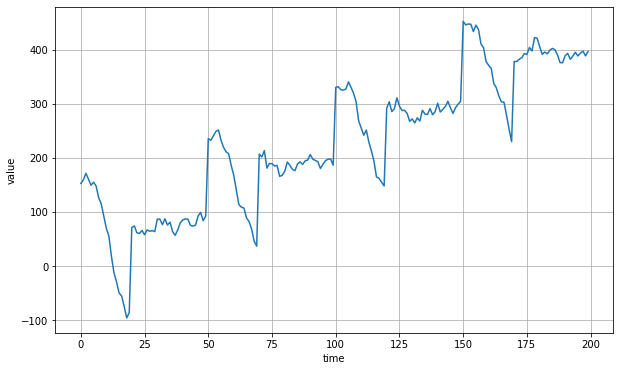

In [0]:
series = autocorelation_2(time , 10 , seed = 42) \
         + seasonality(time , period = 50 , amplitude = 150)\
         + trend(time ,2)

plot_series(time[:200] , series[:200])

plt.show()

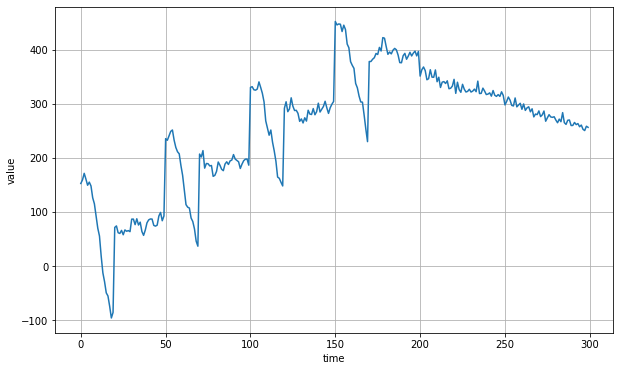

In [0]:
series_1 = autocorelation_1(time , 10 ,seed = 42) \
         + seasonality(time , period = 50 , amplitude = 150) \
         + trend(time , 2)

series_2 = autocorelation_1(time , 5 , seed = 42) \
           + seasonality(time , period = 50 , amplitude = 2) \
           + trend(time ,-1) + 550

series[200:] = series_2[200:]
plot_series(time[:300] , series[:300])
plt.show()

####Impulse and Auto-Correlation

In [0]:

# np.random.RandomState(42).rand()

def impulses(time , no_impulses , amplitude = 1 , seed = None):
  
  #create a random object
  rnd = np.random.RandomState(seed)

  #Select randomly the indices fo rthe spikes/impulse 
  impulse_indices = rnd.randint(len(time) , size = no_impulses )
  print('Impulse Indices : ',impulse_indices)
  
  #create the full series for the dataset :
  series = np.zeros(len(time))
  
  for index in impulse_indices:
    # rnd.rand() generates a random number
    # multiply with amplitude and put the values in places of inpulse_indices
    series[index] = series[index] + ( rnd.rand() * amplitude)
  
  return series

Impulse Indices :  [1126 1459  860 1294 1130 1095 1044  121  466 1238]


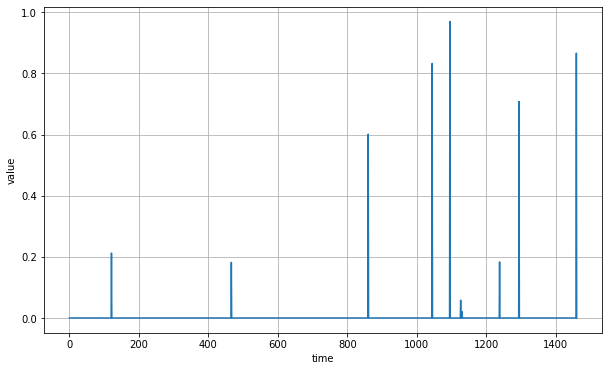

In [0]:
# Lets now create the series and then plot it :

series = impulses(time , no_impulses = 10 , amplitude = 1 ,seed = 42)

plot_series(time,series)

plt.show()

In [0]:
def autocorelation_3(source , phi):
  ar = source.copy()
  max_lag = len(phi)
  
  for step , value in enumerate(source):
    for lag,x in phi.items():
      if step - lag > 0 :
        ar[step] += x * ar[step - lag]
  return ar

Impulse Indices :  [1126 1459  860 1294 1130 1095 1044  121  466 1238]


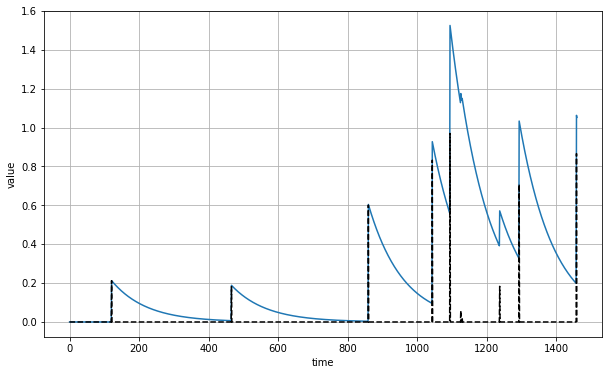

In [0]:
signal = impulses(time , 10 , seed = 42)

series = autocorelation_3(signal , {1:0.99})

plot_series(time ,series)
plt.plot(time , signal , "k--")
plt.show()

Impulse Indices :  [1126 1459  860 1294 1130 1095 1044  121  466 1238]


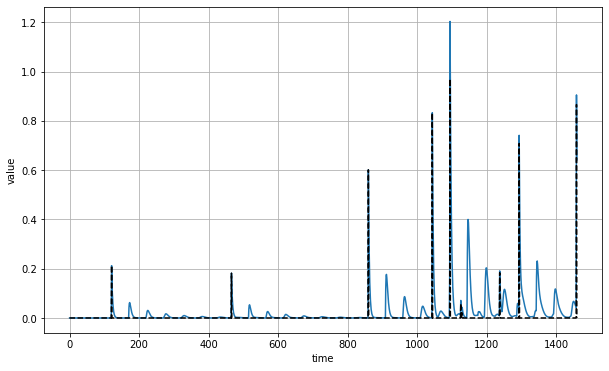

In [0]:
signal = impulses(time , 10 , seed = 42)
series = autocorelation_3(signal , {1:0.70 , 50:0.20})

plot_series(time ,series)

# comment below line to see the series only !!!
plt.plot(time , signal , "k--")

plt.show()

####Difference of two time series :

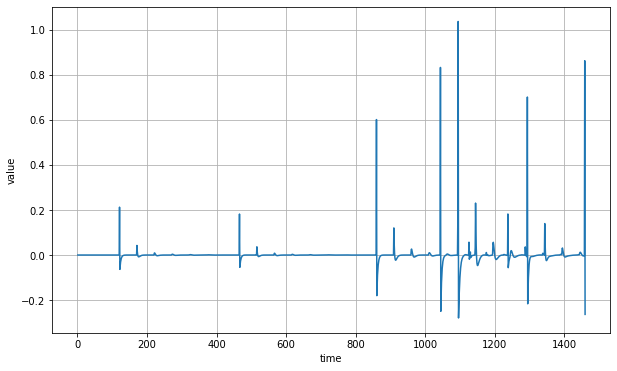

In [0]:
series_diff1 = series[1:] - series[:-1]
plot_series(time[1:], series_diff1)

#### Autocorelation Plotting Using pandas

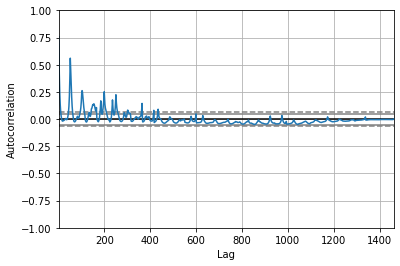

In [0]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(series)

#### ARIMA

In [0]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(series, order=(5, 1, 0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 1460
Model:                 ARIMA(5, 1, 0)   Log Likelihood                2223.428
Method:                       css-mle   S.D. of innovations              0.053
Date:                Thu, 23 Apr 2020   AIC                          -4432.855
Time:                        19:13:38   BIC                          -4395.852
Sample:                             1   HQIC                         -4419.052
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.001      0.384      0.701      -0.001       0.002
ar.L1.D.y     -0.1235      0.026     -4.714      0.000      -0.175      -0.072
ar.L2.D.y     -0.1254      0.029     -4.333      0.0

### Basic Prediction Approaches for the time series Data:

In [0]:
!pip install tensorflow==2.0.0-beta0

In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
print(tf.__version__)

2.0.0-beta0


Now lets set up the data with Time Series Seasonality Trend and bit of Noise :

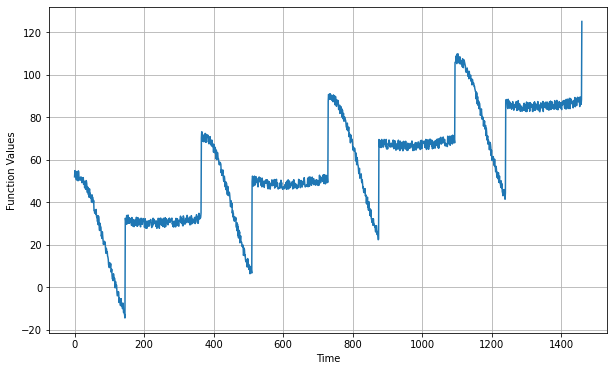

In [0]:

def plot_series(X, Y , label = None , start = 0 , end = None , format = '-'):
  #plt.figure(figsize = (10,6))
  plt.plot(X[start:end],Y[start:end] , format , label = label)
  plt.xlabel('Time')
  plt.ylabel('Function Values')
  plt.grid(True)


def trend(x, slope):
  return x*slope

def seasonal_patteren(season_time):
  return np.where(season_time < 0.4 , np.cos(2 * np.pi * season_time) , 1 / np.exp(3*season_time) )

def seasonality(time , period , amplitude = 1 , phase = 0 ):
  season_time = ((time + phase) % period) / period
  return amplitude*seasonal_patteren(season_time)

def noise(time , noise_level, seed = None):
  rnd = np.random.RandomState(seed = seed)
  return rnd.rand(len(time))*noise_level


time = np.arange(4*365 + 1 , dtype = 'float32')

baseline = 10

series = baseline \
         + trend(time, slope = 0.05) \
         + seasonality(time , period = 365 , amplitude = 40 , phase = 0)\
         + noise(time , noise_level = 5 , seed = 42)


plt.figure(figsize = (10,6))
plot_series(time ,series)
plt.show()

Now that we have a time series lets divide into train validation test for forcasting :

(1000,)
(461,)
69.25987036786665


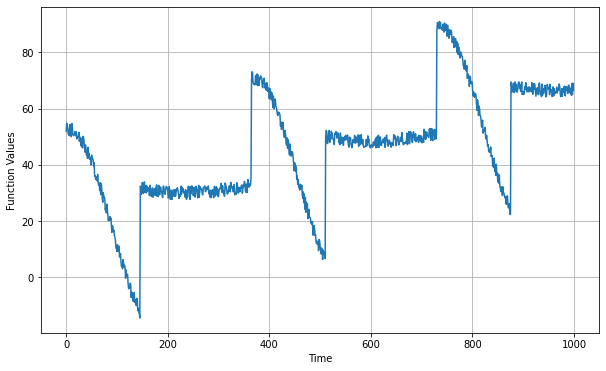

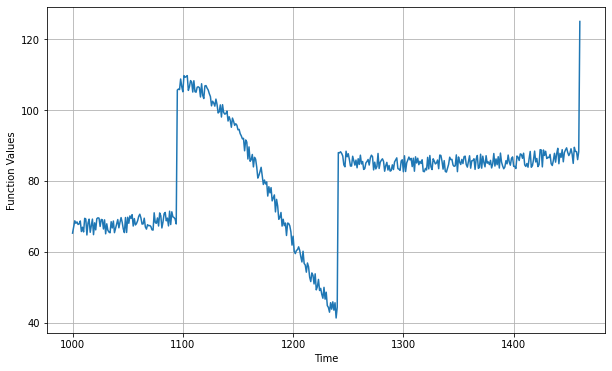

In [0]:
split_time = 1000

time_train = time[:split_time]
x_train = series[:split_time]
print(x_train.shape)


time_valid = time[split_time :]
x_valid = series[split_time:]
print(x_valid.shape)
print(x_valid[12])

plt.figure(figsize = (10,6))
plot_series(time_train, x_train)
plt.show()

plt.figure(figsize = (10,6))
plot_series(time_valid , x_valid)
plt.show()


####Forcasting Techniques:

Naive Forecasting:

In [0]:
# lets take the entire validation part of the series except the last value
naive_forcast = series[split_time - 1 : -1] #take from series ....just one unit shifted from the valid set 
print(naive_forcast.shape)
print(naive_forcast[11])

(461,)
65.61091476280895


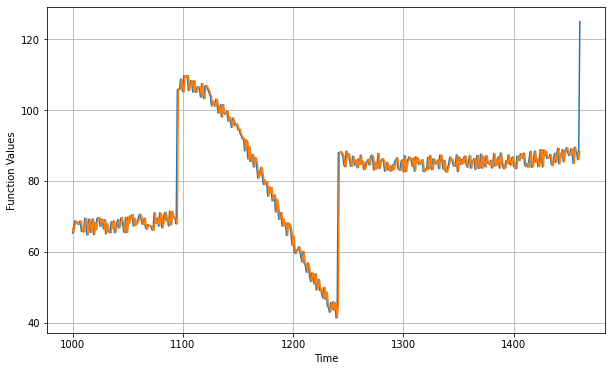

In [0]:
plt.figure(figsize=(10,6))
plot_series(time_valid,x_valid)
plot_series(time_valid , naive_forcast)
plt.show()

Lets Try to Zoom into the starting phase :

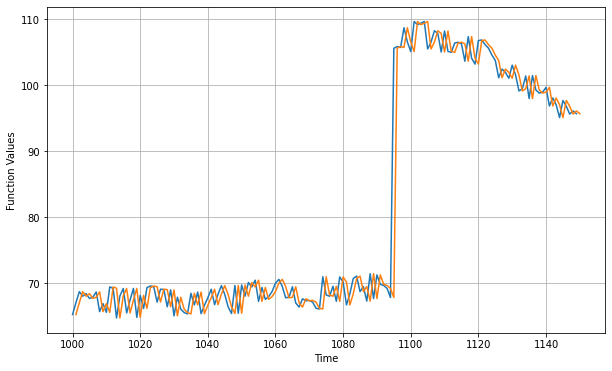

In [0]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid, start = 0, end = 150)
plot_series(time_valid, naive_forcast, start = 1, end = 151)

So basically Naive is just 1 step behind the validation set !!!

Lets now find the mean-squared-error and mean-absolute-error betwenn the forecasts and the predictions in the validation period

In [0]:
print(tf.keras.metrics.mean_squared_error(x_valid,naive_forcast).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid,naive_forcast).numpy())

14.915372880316045
2.044857474863894


This is our baseline . Now lets try the Moving Average Method :

In [0]:
def moving_average_forecast(series , window_size):
  forecast = []
  for time in range(len(series) - window_size):
    forecast.append(series[time:time+window_size].mean())
  return np.array(forecast)


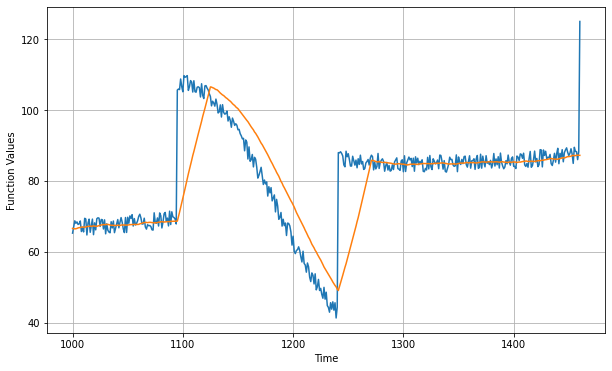

In [0]:
moving_average = moving_average_forecast(series , 30)[split_time-30:]

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, moving_average)

In [0]:
print(tf.keras.metrics.mean_squared_error(x_valid, moving_average).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, moving_average).numpy())

88.88587992844113
5.46792220786647


That's worse than naive forecast! The moving average does not anticipate trend or seasonality, so let's try to remove them by using differencing. Since the seasonality period is 365 days, we will subtract the value at time *t* – 365 from the value at time *t*.

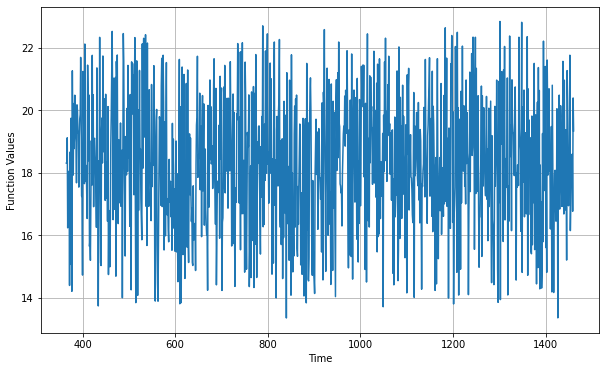

In [0]:
diff_series = (series[365:] - series[:-365])
diff_time = time[365:]

plt.figure(figsize=(10, 6))
plot_series(diff_time, diff_series)
plt.show()

Great, the trend and seasonality seem to be gone, so now we can use the moving average:

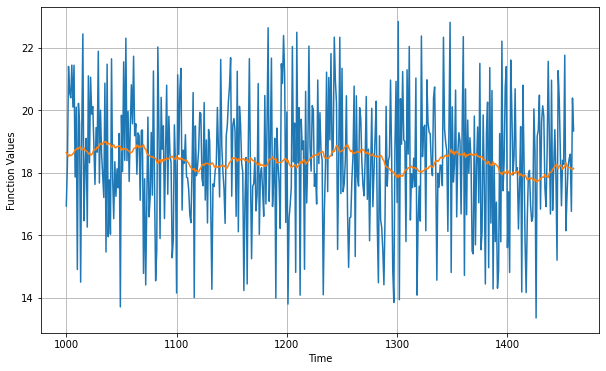

In [0]:
diff_moving_avg = moving_average_forecast(diff_series, 50)[split_time - 365 - 50:]

plt.figure(figsize=(10, 6))
plot_series(time_valid, diff_series[split_time - 365:])
plot_series(time_valid, diff_moving_avg)
plt.show()

Now let's bring back the trend and seasonality by adding the past values from t – 365:

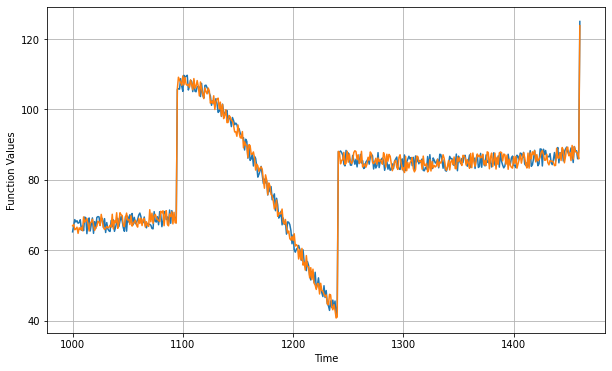

In [0]:
diff_moving_avg_plus_past = series[split_time - 365:-365] + diff_moving_avg

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, diff_moving_avg_plus_past)
plt.show()

In [0]:
print(tf.keras.metrics.mean_squared_error(x_valid, diff_moving_avg_plus_past).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, diff_moving_avg_plus_past).numpy())

4.2680543230802055
1.661313523337758


Better than naive forecast, good. However the forecasts look a bit too random, because we're just adding past values, which were noisy. Let's use a moving averaging on past values to remove some of the noise:

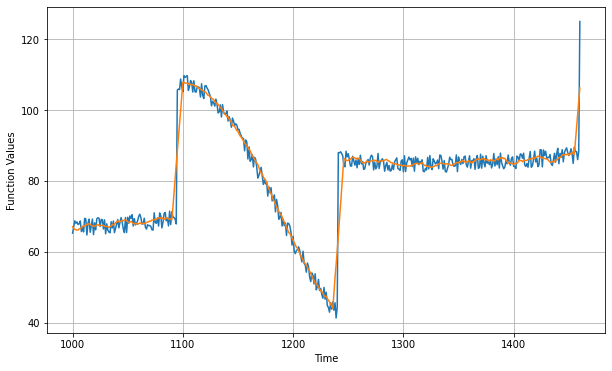

In [0]:
diff_moving_avg_plus_smooth_past = moving_average_forecast(series[split_time - 370:-360], 10) + diff_moving_avg

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, diff_moving_avg_plus_smooth_past)
plt.show()

In [0]:
print(tf.keras.metrics.mean_squared_error(x_valid, diff_moving_avg_plus_smooth_past).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, diff_moving_avg_plus_smooth_past).numpy())

10.496939596054023
1.8651288830557378


###Exercise -01 

####Data Creation :

In [0]:
import tensorflow as tf
print(tf.__version__)

# EXPECTED OUTPUT
# 2.0.0-beta1 (or later)


2.0.0-beta0


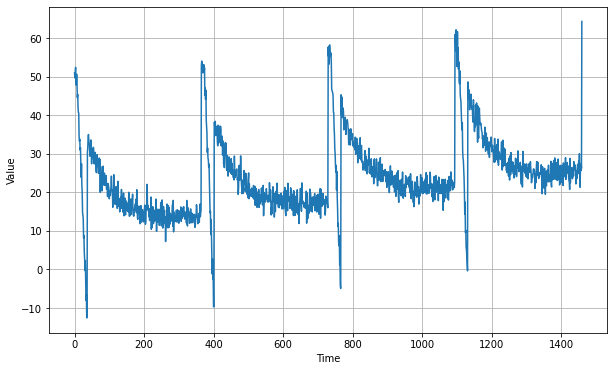

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

def trend(time, slope=0):
    return slope * time

def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.1,
                    np.cos(season_time * 7 * np.pi),
                    1 / np.exp(5 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

time = np.arange(4 * 365 + 1, dtype="float32")
baseline = 10
series = trend(time, 0.1)  
baseline = 10
amplitude = 40
slope = 0.01
noise_level = 2

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)
# Update with noise
series += noise(time, noise_level, seed=42)

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

# EXPECTED OUTPUT
# Chart as in the screencast. First should have 5 distinctive 'peaks'

Now that we have the time series, let's split it so we can start forecasting



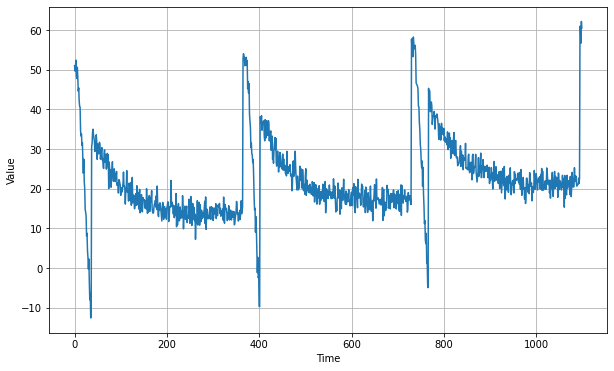

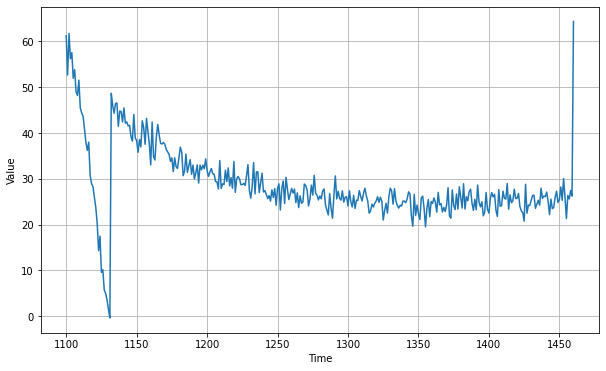

In [0]:
split_time = 1100

time_train = time[:split_time]
x_train = series[:split_time]

time_valid = time[split_time:]
x_valid = series[split_time:]

plt.figure(figsize=(10, 6))
plot_series(time_train, x_train)
plt.show()

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plt.show()

# EXPECTED OUTPUT
# Chart WITH 4 PEAKS between 50 and 65 and 3 troughs between -12 and 0
# Chart with 2 Peaks, first at slightly above 60, last at a little more than that, should also have a single trough at about 0

####Naive Forecast

In [0]:
naive_forecast = series[split_time - 1:-1]#YOUR CODE HERE]

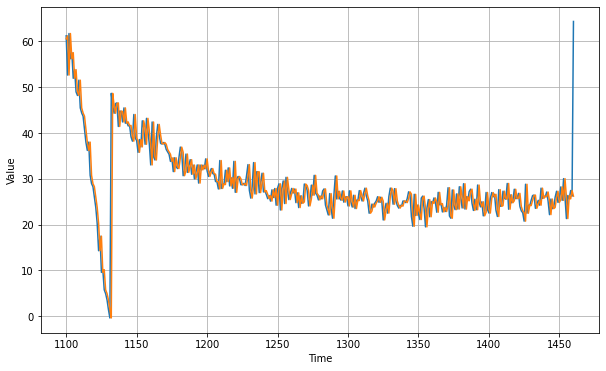

In [0]:
plt.figure(figsize = (10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, naive_forecast)

# Expected output: Chart similar to above, but with forecast overlay

Let's zoom in on the start of the validation period:

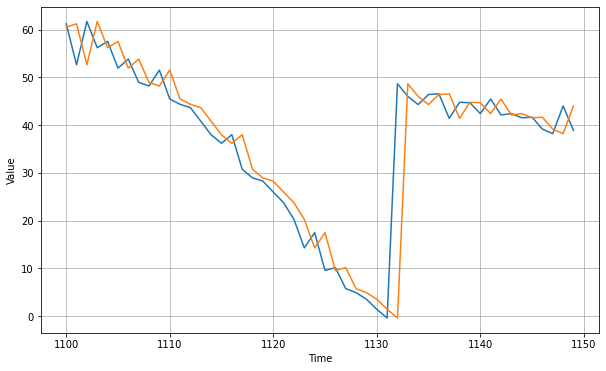

In [0]:
plt.figure(figsize=(10, 6))
plot_series(time_valid[:50] , x_valid[:50])# YOUR CODE HERE)
plot_series(time_valid[:50],naive_forecast[:50])# YOUR CODE HERE)

# EXPECTED - Chart with X-Axis from 1100-1250 and Y Axes with series value and projections. Projections should be time stepped 1 unit 'after' series

Now let's compute the mean squared error and the mean absolute error between the forecasts and the predictions in the validation period:

In [0]:
print(tf.keras.metrics.mean_squared_error(x_valid,naive_forecast).numpy())# YOUR CODE HERE)

print(tf.keras.metrics.mean_absolute_error(x_valid,naive_forecast).numpy())# YOUR CODE HERE)
# Expected Output
# 19.578304
# 2.6011968

19.578304
2.6011968


####Moving Average Forecast:

That's our baseline, now let's try a moving average:

In [0]:
def moving_average_forecast(series, window_size):
  """Forecasts the mean of the last few values.
     If window_size=1, then this is equivalent to naive forecast"""
  # YOUR CODE HERE
  predicted = []
  for i in range(len(series)- window_size):
    predicted.append(series[i:i+window_size].mean())
  return np.array(predicted)

(361,)


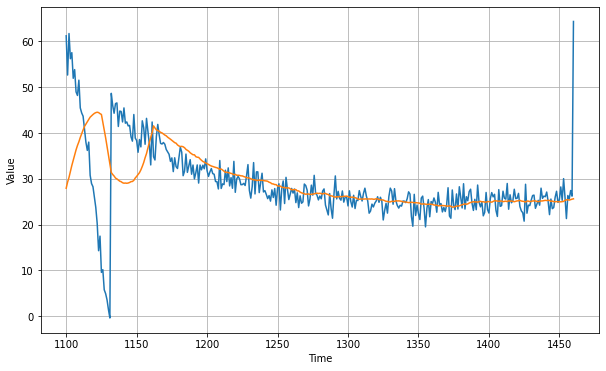

In [0]:
window_size = 30
moving_avg = moving_average_forecast(series,window_size)[(split_time-window_size):]# YOUR CODE HERE)[# YOUR CODE HERE]

print(moving_avg.shape)

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, moving_avg)
    
# EXPECTED OUTPUT
# CHart with time series from 1100->1450+ on X
# Time series plotted
# Moving average plotted over it

In [0]:
print(tf.keras.metrics.mean_squared_error(x_valid,moving_avg).numpy())# YOUR CODE HERE)
print(tf.keras.metrics.mean_absolute_error(x_valid,moving_avg).numpy())# YOUR CODE HERE)
# EXPECTED OUTPUT
# 65.786224
# 4.3040023

65.786224
4.3040023


####Moving Average without Seasonality :

(1096,)


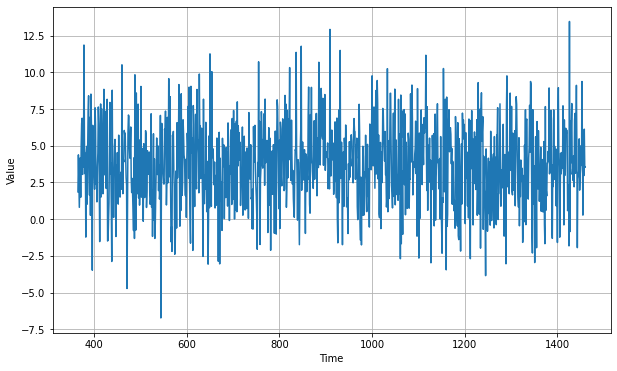

In [0]:
diff_series = (series[365:] - series[:-365])# YOUR CODE HERE)
diff_time = time[365:]# YOUR CODE HERE

print(diff_series.shape)
plt.figure(figsize=(10, 6))
plot_series(diff_time, diff_series)
plt.show()
    
# EXPECETED OUTPUT: CHart with diffs

Great, the trend and seasonality seem to be gone, so now we can use the moving average:

(361,)


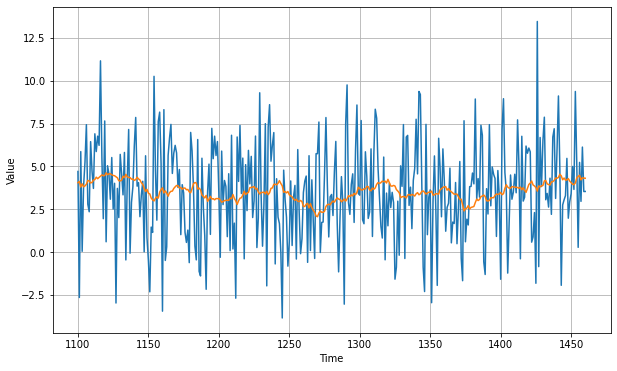

In [0]:
diff_moving_avg = moving_average_forecast(diff_series , window_size)[(split_time -365- window_size):]# YOUR CODE HERE

print(diff_moving_avg.shape)
plt.figure(figsize=(10, 6))
plot_series(time_valid, diff_series[split_time-365:])# YOUR CODE HERE)
plot_series(time_valid, diff_moving_avg )# YOUR CODE HERE)
plt.show()
            
# Expected output. Diff chart from 1100->1450 +
# Overlaid with moving average

Now let's bring back the trend and seasonality by adding the past values from t – 365:

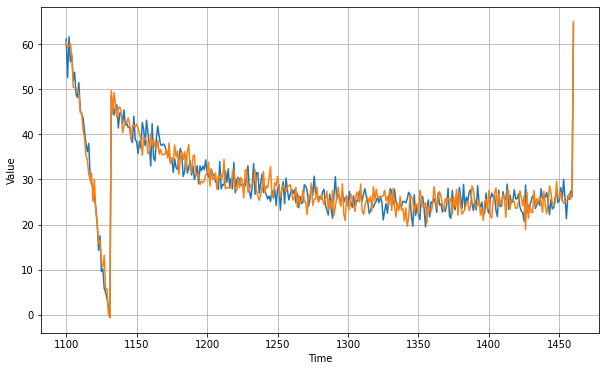

In [0]:
diff_moving_avg_plus_past = series[split_time - 365:-365] + diff_moving_avg# YOUR CODE HERE

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)# YOUR CODE HERE)
plot_series(time_valid, diff_moving_avg_plus_past)# YOUR CODE HERE)
plt.show()
# Expected output: Chart from 1100->1450+ on X. Same chart as earlier for time series, but projection overlaid looks close in value to it

In [0]:
print(tf.keras.metrics.mean_squared_error(x_valid, diff_moving_avg_plus_past).numpy())# YOUR CODE HERE)
print(tf.keras.metrics.mean_absolute_error(x_valid, diff_moving_avg_plus_past).numpy())# YOUR CODE HERE)
# EXPECTED OUTPUT
# 8.498155
# 2.327179

8.589116
2.3517225


Better than naive forecast, good. However the forecasts look a bit too random, because we're just adding past values, which were noisy. Let's use a moving averaging on past values to remove some of the noise:

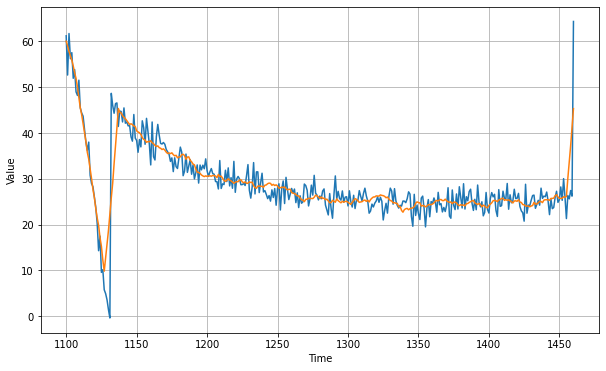

In [0]:
diff_moving_avg_plus_smooth_past = moving_average_forecast(series[split_time - 370:-360], 10) + diff_moving_avg # YOUR CODE HERE

plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)# YOUR CODE HERE)
plot_series(time_valid, diff_moving_avg_plus_smooth_past) # YOUR CODE HERE)
plt.show()
            
# EXPECTED OUTPUT:
# Similar chart to above, but the overlaid projections are much smoother

In [0]:
print(keras.metrics.mean_squared_error(x_valid, diff_moving_avg_plus_smooth_past).numpy())# YOUR CODE HERE)
print(keras.metrics.mean_absolute_error(x_valid, diff_moving_avg_plus_smooth_past).numpy())# YOUR CODE HERE)
# EXPECTED OUTPUT
# 12.527958
# 2.2034433

12.551783
2.199329
